### $\tau$ resolved results

In [480]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [481]:
%%time
# To store raw data
K_raw={}
V_raw={}
E_raw={}

# To store equilibrated data
K = {}
V = {}
E = {}

CPU times: user 169 µs, sys: 4.71 ms, total: 4.88 ms
Wall time: 4.94 ms


In [662]:
%%time
# K_raw['beta=3'] = np.loadtxt("resolved/2_2_1.0000_-2.1000_1.0000_3.0000_0.1000_30000000_canK.dat")
# V_raw['beta=3'] = np.loadtxt("resolved/2_2_1.0000_-2.1000_1.0000_3.0000_0.1000_30000000_canV.dat")
# K_raw['beta=5'] = np.loadtxt("resolved/2_2_2.0000_-0.8000_1.0000_5.0000_0.1000_1000000_canK.dat")
# V_raw['beta=5'] = np.loadtxt("resolved/2_2_2.0000_-0.8000_1.0000_5.0000_0.1000_1000000_canV.dat")
# K_raw['beta=1'] = np.loadtxt("2_2_1.0000_-1.2000_1.0000_0.1000_1.0000_100000_canK.dat")
# V_raw['beta=1'] = np.loadtxt("2_2_1.0000_-1.2000_1.0000_0.1000_1.0000_100000_canV.dat")

K_raw['beta=1'] = np.loadtxt("2_2_1.0000_-1.2000_1.0000_0.1000_2.0000_400000_canK.dat")
V_raw['beta=1'] = np.loadtxt("2_2_1.0000_-1.2000_1.0000_0.1000_2.0000_400000_canV.dat")
# old_estimator = np.loadtxt("2_2_1.0000_-2.0000_1.0000_0.1000_2.0000_20000000_canK_og.dat")

CPU times: user 524 ms, sys: 15.7 ms, total: 540 ms
Wall time: 572 ms


In [663]:
# print(len(K_raw['beta=3']))
# print(len(K_raw['beta=5']))
print(len(K_raw['beta=1']))

24553


In [664]:
# Throw away data because of equilibration
beta_list = [1,3,5]
beta_list = [1]

# List of mu corrections for each run
correction_list = np.array([-1.2,-1.4,-1.7,-1.7,-1.7,-1.6,-1.6,-1.6,-1.6,-1.7])*2
correction = -1.2*2

for i,beta in enumerate(beta_list):
    
    label = f'beta={beta}'
    
    samples = len(K_raw[label])

    # Throw away presumably inequilibrated data
    K[label] = K_raw[label][int(samples*0.1):]
    V[label] = V_raw[label][int(samples*0.1):]+correction
    E[label] = K[label]+V[label]

In [665]:
# Get mean and standard error as measured from various tau slices
K_mean = {}
V_mean = {}
E_mean = {}

K_err = {}
V_err = {}
E_err = {}

for beta in beta_list:
    
    label = f'beta={beta}'

    samples = len(K[label])
    
    K_mean[label] = np.mean(K[label],axis=0)
    V_mean[label] = np.mean(V[label],axis=0)
    E_mean[label]= np.mean(E[label],axis=0)
    
    K_err[label] = sem(K[label],axis=0)
    V_err[label] = sem(V[label],axis=0)
    E_err[label]= sem(E[label],axis=0)
    

In [666]:
# Generate the tau slices (actually fractions of beta)
dtau=0.1
start = dtau
beta=2
tau_slices = np.linspace(0,beta,11)[1:-1]

# for i in range(int(beta/(2*dtau))):
#     tau_slices.append(start)
#     start += 2*dtau
# list(enumerate(tau_slices))

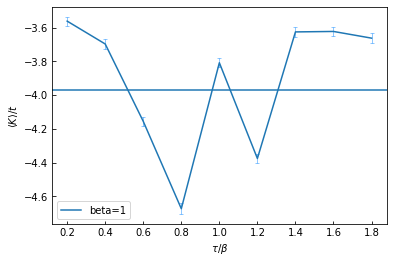

In [667]:
# Plot kinetic energy as function of tau slices
fig, ax1 = plt.subplots()
i = 1
label = f'beta={i}'
ax1.plot(tau_slices,K_mean[label],'-',label=label)
ax1.errorbar(tau_slices,K_mean[label],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=K_err[label],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)

ax1.axhline(-3.5311-0.438)
ax1.set_ylabel(r'$\langle K \rangle /t$')
ax1.set_xlabel(r'$\tau/\beta$')
ax1.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.legend()

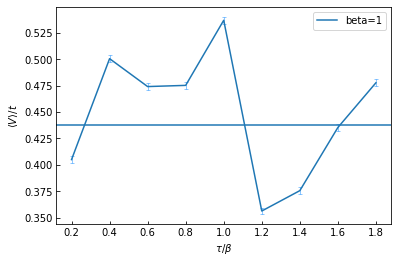

In [668]:
# Plot diagonal energy as function of tau slices
fig, ax2 = plt.subplots()
ax2.plot(tau_slices,V_mean[label],'-',label=label)
ax2.errorbar(tau_slices,V_mean[label],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=V_err[label],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
ax2.axhline(0.438)
ax2.set_ylabel(r'$\langle V \rangle /t$')
ax2.set_xlabel(r'$\tau/\beta$')
ax2.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.legend()

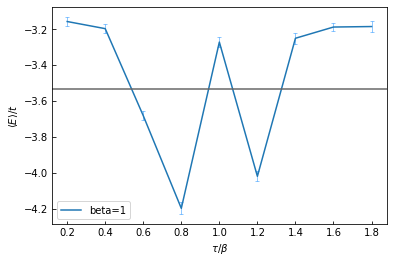

In [669]:
# Plot total ground state energy as function of tau slices
fig, ax3 = plt.subplots()
ax3.plot(tau_slices,E_mean[label],'-',label=label)
ax3.errorbar(tau_slices,E_mean[label],marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=E_err[label],fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
ax3.axhline(-3.531128874149274,color='#666666')
#ax3.axhline(-0.15974481593782386,color='#666666')
ax3.set_ylabel(r'$\langle E \rangle /t$')
ax3.set_xlabel(r'$\tau/\beta$')
ax3.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.legend()
plt.savefig('energy_tau_slice_dependence_1mill_points.pdf')

In [670]:
### Running averages

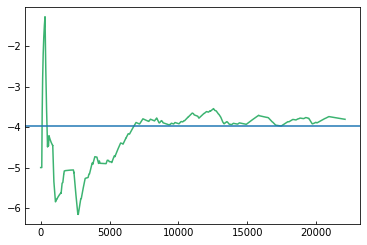

In [671]:
half_idx=4
K_halfBeta = K[label][:,half_idx]
K_halfBeta_cumsum = np.cumsum(K_halfBeta)
for i in range(len(K_halfBeta)):
    K_halfBeta_cumsum[i] /= (i+1)
    
fig, ax4 = plt.subplots()
ax4.plot(K_halfBeta_cumsum,'-',color='mediumseagreen',label=r'$\beta=9.0$')
ax4.axhline(-3.5311-0.438)
ax4.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')

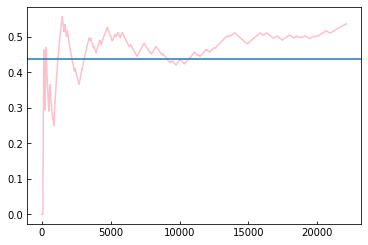

In [672]:
V_halfBeta = V[label][:,half_idx]
V_halfBeta_cumsum = np.cumsum(V_halfBeta)
for i in range(len(V_halfBeta)):
    V_halfBeta_cumsum[i] /= (i+1)
    
fig, ax5 = plt.subplots()
ax5.plot(V_halfBeta_cumsum,'-',color='pink',label=r'$\beta=9.0$')
ax5.axhline(0.438)
ax5.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')

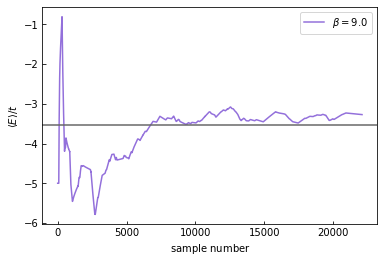

In [673]:
E_halfBeta = E[label][:,half_idx]
E_halfBeta_cumsum = np.cumsum(E_halfBeta)
for i in range(len(E_halfBeta)):
    E_halfBeta_cumsum[i] /= (i+1)
fig, ax6 = plt.subplots()
ax6.plot(E_halfBeta_cumsum,'-',color='mediumpurple',label=r'$\beta=9.0$')
ax6.set_ylabel(r'$\langle E \rangle / t$')
ax6.set_xlabel(r'$\rm{sample \ number}$')
ax6.axhline(-3.531128874149274,color='#666666')
#ax6.set_ylim(-3.6,-2)
ax6.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
plt.legend()
plt.savefig('E_running_avg_beta9.pdf')

### $\langle E(\tau/\beta=0.5) \rangle$ / t vs. $\beta$

KeyError: 'beta=2'

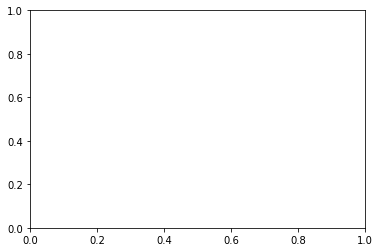

In [316]:
# Plot total ground state energy as function of tau slices
fig, ax7 = plt.subplots()
plot_list = list(range(1,10,1))
 
E_center_mean = []
E_center_err = []
for i in plot_list:
    # Attach center data
    label = f'beta={i}'
    E_center_mean.append(E_mean[label][2])
    E_center_err.append(E_err[label][2])



ax7.plot(plot_list,E_center_mean,'-',label=label,color='lightskyblue')
ax7.errorbar(plot_list,E_center_mean,marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=E_center_err,fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
ax7.axhline(-3.531128874149274,color='#666666')
ax7.set_ylabel(r'$\langle E \rangle /t$')
ax7.set_xlabel(r'$\beta$')
ax7.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
#plt.legend()
plt.savefig('energy_beta_dependence_1mill_points.pdf')